In [51]:
import numpy as np
import scipy.signal as sp
import matplotlib.pyplot as plt
import PyDynamic as pd

#### Функции

In [52]:
# Диаграмма нулей и полюсов
def ZerosPolesDiagram(z, p):
    fg, ax = plt.subplots(figsize=(5, 5))
    circle = plt.Circle(xy=(0,0),radius=1, edgecolor='gray', facecolor='white', linestyle='--')
    ax.add_patch(circle)
    ax.scatter(z.real, z.imag, marker='o', facecolor='white', edgecolor='C0', s=100)
    ax.scatter(p.real, p.imag, marker='x', s=100)
    ax.axhline(y=0, color="black", linestyle="-")
    ax.axvline(x=0, color="black", linestyle="-")
    ax.grid()
    plt.show()

# Расчет АЧХ
def FrequencyResponse(h):
    with np.errstate(divide='ignore'): # suppress RuntimeWarning: divide by zero encountered in log10
        return 20 * np.log10(abs(h))

# Расчет ФЧХ
def PhaseResponse(h):
    return np.unwrap(np.angle(h))

# Графики АЧХ и ФЧХ
def FRPRDiagram(w, fr, pr, logx = False, **kwargs):
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,5), layout='constrained')

    if (logx):
        ax[0].semilogx(w, fr, 'b')
    else:
        ax[0].plot(w, fr, 'b')
    ax[0].set_ylabel('Амплитуда, дБ', color='b')
    ax[0].set_xlabel('Частота, рад/с')
    ax[0].grid(True)

    if (logx):
        ax[1].semilogx(w, pr, 'g')
    else:
        ax[1].plot(w, pr, 'g')
    ax[1].set_ylabel('Фаза, рад', color='g')
    ax[1].set_xlabel('Частота, рад/с')
    ax[1].grid(True)

    if 'title' in kwargs.keys():
        fig.suptitle(kwargs['title'])

    if 'ylimits' in kwargs.keys():
        ax[0].set_ylim(kwargs['ylimits'])

    if 'xvlines' in kwargs.keys():
        for xvline in kwargs['xvlines']:
            for axis in ax:
                axis.axvline(x=xvline, color='gray', linestyle='dashed', linewidth=1.5)
    
    plt.show()

# Оболочка для отрисовки графика при вызове функций freqs и freqz в линейном масштабе
def FRPRDiag (w, h):
    FRPRDiagram(w, FrequencyResponse(h), PhaseResponse(h), logx=False)

# Оболочка для отрисовки графика при вызове функций freqs и freqz в логарифмическом масштабе
def FRPRDiagLog (w, h):
    FRPRDiagram(w, FrequencyResponse(h), PhaseResponse(h), logx=True)


#### Дискретизация аналоговых фильтров при помощи инвариантного преобразования

[0.25059432 0.         0.         0.        ]
[ 1.          0.59724042  6.92834806  2.63955599 13.85669612  2.38896167
  8.        ]


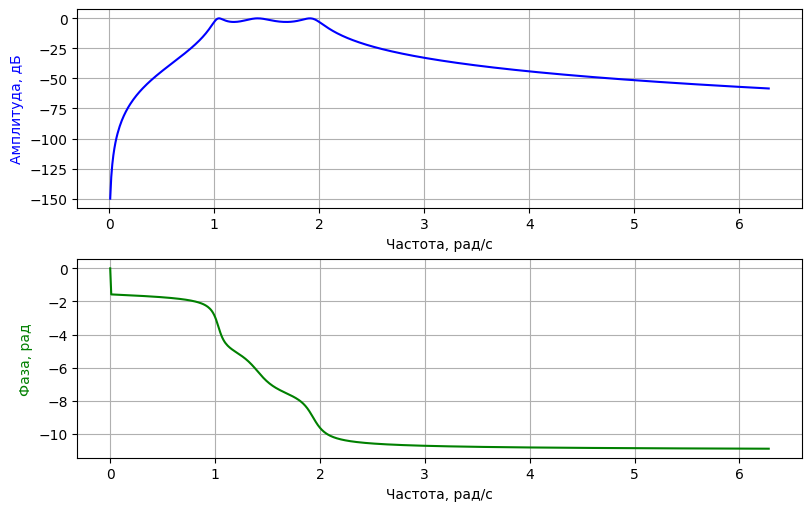

In [344]:
# b, a = sp.butter(N=3, Wn=1, btype='lowpass', analog=True, output='ba')
# b, a = sp.butter(N=3, Wn=[1,2], btype='bandpass', analog=True, output='ba')

# b, a = sp.butter(N=10, Wn=1, btype='lowpass', analog=True, output='ba')
# b, a = sp.butter(N=10, Wn=1, btype='highpass', analog=True, output='ba')
# b, a = sp.butter(N=10, Wn=[1,2], btype='bandpass', analog=True, output='ba')
# b, a = sp.butter(N=10, Wn=[1,2], btype='bandstop', analog=True, output='ba')

# b, a = sp.cheby1(N=3, Wn=1, rp=3, btype='lowpass', analog=True, output='ba')
b, a = sp.cheby1(N=3, Wn=[1,2], rp=3, btype='bandpass', analog=True, output='ba')

# b, a = sp.cheby1(N=10, Wn=1, rp=10, btype='lowpass', analog=True, output='ba')
# b, a = sp.cheby1(N=10, Wn=1, rp=10, btype='highpass', analog=True, output='ba')
# b, a = sp.cheby1(N=10, Wn=[1,2], rp=10, btype='bandpass', analog=True, output='ba')
# b, a = sp.cheby1(N=10, Wn=[1,2], rp=10, btype='bandstop', analog=True, output='ba')

# b, a = sp.cheby2(N=3, Wn=1, rs=30, btype='lowpass', analog=True, output='ba')
# b, a = sp.cheby2(N=3, Wn=[1,2], rs=30, btype='bandpass', analog=True, output='ba')

# b, a = sp.cheby2(N=10, Wn=1, rs=50, btype='lowpass', analog=True, output='ba')
# b, a = sp.cheby2(N=10, Wn=1, rs=50, btype='highpass', analog=True, output='ba')
# b, a = sp.cheby2(N=10, Wn=[1,2], rs=50, btype='bandpass', analog=True, output='ba')
# b, a = sp.cheby2(N=10, Wn=[1,2], rs=50, btype='bandstop', analog=True, output='ba')

# b, a = sp.ellip(N=3, Wn=1, rp=3, rs=30, btype='lowpass', analog=True, output='ba')
# b, a = sp.ellip(N=3, Wn=[1,2], rp=3, rs=30, btype='bandpass', analog=True, output='ba')

# b, a = sp.ellip(N=10, Wn=1, rp=10, rs=50, btype='lowpass', analog=True, output='ba')
# b, a = sp.ellip(N=10, Wn=1, rp=10, rs=50, btype='highpass', analog=True, output='ba')
# b, a = sp.ellip(N=10, Wn=[1,2], rp=10, rs=50, btype='bandpass', analog=True, output='ba')
# b, a = sp.ellip(N=10, Wn=[1,2], rp=10, rs=50, btype='bandstop', analog=True, output='ba')

print(b)
print(a)

# w, mag, phase = sp.bode(system=(b, a), w=np.arange(start=0, stop=2*np.pi, step=0.01))
# FRPRDiagram(w=w, fr=mag, pr=phase)
w,h = sp.freqs(b=b, a=a, worN=np.arange(start=0, stop=2*np.pi, step=0.01), plot=FRPRDiag)

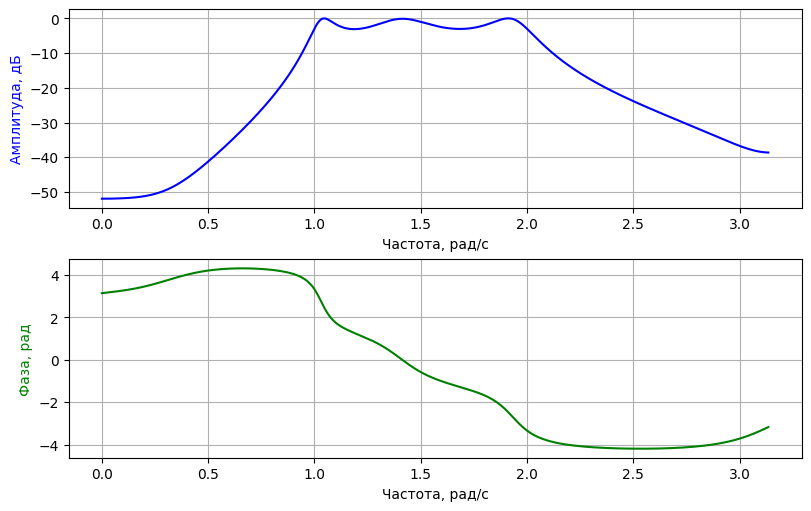

In [345]:
# bi, ai = pd.impinvar(b_in=b, a_in=a, fs=10/2/np.pi)
bi, ai = pd.impinvar(b_in=b, a_in=a)
# w, mag, phase = sp.dbode(system=(bi, ai, 1), w=np.arange(start=0, stop=2*np.pi, step=0.01))
# FRPRDiagram(w=w, fr=mag, pr=phase)
# w,h = sp.freqz(b=bi, a=ai, whole=True, plot=FRPRDiag)
w,h = sp.freqz(b=bi, a=ai, whole=False, plot=FRPRDiag)

#### AP

[0.25059432 0.         0.         0.        ]
[ 1.          0.59724042  7.67834806  2.9381762  17.27628313  3.02352961
 11.390625  ]


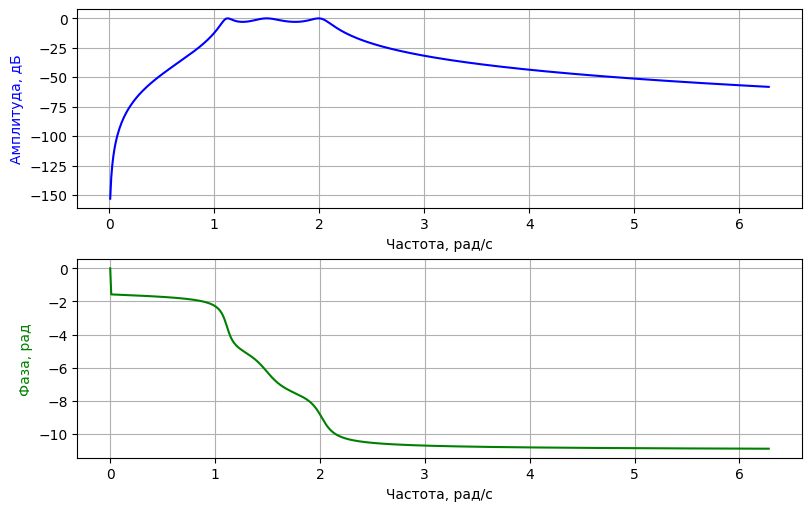

In [346]:
# z, p, k = sp.buttap(N=3)

z, p, k = sp.cheb1ap(N=3, rp=3)

z, p, k = sp.lp2bp_zpk(z=z, p=p, k=k, wo=1.5, bw=1)

b, a = sp.zpk2tf(z=z, p=p, k=k)

# b, a = sp.butter(N=2, Wn=1, btype='lowpass', analog=True, output='ba')
# b, a = sp.butter(N=3, Wn=[1,2], btype='bandpass', analog=True, output='ba')

# b, a = sp.butter(N=10, Wn=1, btype='lowpass', analog=True, output='ba')
# b, a = sp.butter(N=10, Wn=1, btype='highpass', analog=True, output='ba')
# b, a = sp.butter(N=10, Wn=[1,2], btype='bandpass', analog=True, output='ba')
# b, a = sp.butter(N=10, Wn=[1,2], btype='bandstop', analog=True, output='ba')

# b, a = sp.cheby1(N=3, Wn=1, rp=3, btype='lowpass', analog=True, output='ba')
# b, a = sp.cheby1(N=3, Wn=[1,2], rp=3, btype='bandpass', analog=True, output='ba')

# b, a = sp.cheby1(N=10, Wn=1, rp=10, btype='lowpass', analog=True, output='ba')
# b, a = sp.cheby1(N=10, Wn=1, rp=10, btype='highpass', analog=True, output='ba')
# b, a = sp.cheby1(N=10, Wn=[1,2], rp=10, btype='bandpass', analog=True, output='ba')
# b, a = sp.cheby1(N=10, Wn=[1,2], rp=10, btype='bandstop', analog=True, output='ba')

# b, a = sp.cheby2(N=3, Wn=1, rs=30, btype='lowpass', analog=True, output='ba')
# b, a = sp.cheby2(N=3, Wn=[1,2], rs=30, btype='bandpass', analog=True, output='ba')

# b, a = sp.cheby2(N=10, Wn=1, rs=50, btype='lowpass', analog=True, output='ba')
# b, a = sp.cheby2(N=10, Wn=1, rs=50, btype='highpass', analog=True, output='ba')
# b, a = sp.cheby2(N=10, Wn=[1,2], rs=50, btype='bandpass', analog=True, output='ba')
# b, a = sp.cheby2(N=10, Wn=[1,2], rs=50, btype='bandstop', analog=True, output='ba')

# b, a = sp.ellip(N=3, Wn=1, rp=3, rs=30, btype='lowpass', analog=True, output='ba')
# b, a = sp.ellip(N=3, Wn=[1,2], rp=3, rs=30, btype='bandpass', analog=True, output='ba')

# b, a = sp.ellip(N=10, Wn=1, rp=10, rs=50, btype='lowpass', analog=True, output='ba')
# b, a = sp.ellip(N=10, Wn=1, rp=10, rs=50, btype='highpass', analog=True, output='ba')
# b, a = sp.ellip(N=10, Wn=[1,2], rp=10, rs=50, btype='bandpass', analog=True, output='ba')
# b, a = sp.ellip(N=10, Wn=[1,2], rp=10, rs=50, btype='bandstop', analog=True, output='ba')

print(b)
print(a)

# w, mag, phase = sp.bode(system=(b, a), w=np.arange(start=0, stop=2*np.pi, step=0.01))
# FRPRDiagram(w=w, fr=mag, pr=phase)
w,h = sp.freqs(b=b, a=a, worN=np.arange(start=0, stop=2*np.pi, step=0.01), plot=FRPRDiag)

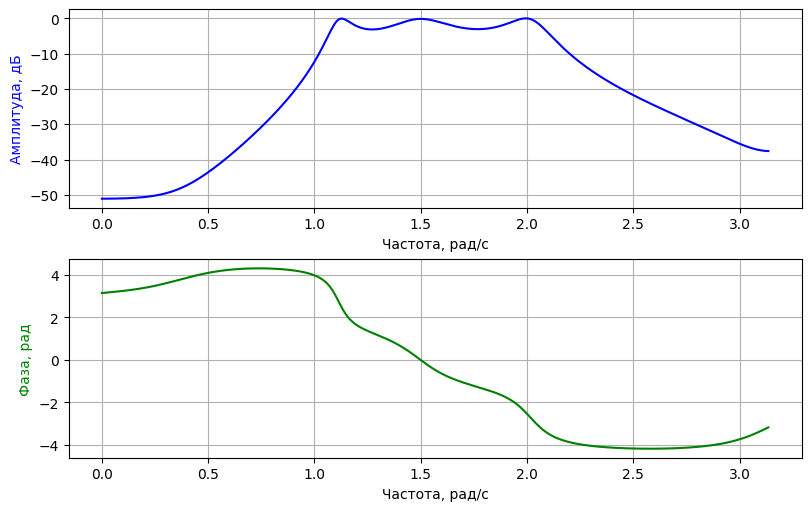

In [347]:
# bi, ai = pd.impinvar(b_in=b, a_in=a, fs=10/2/np.pi)
bi, ai = pd.impinvar(b_in=b, a_in=a)
# w, mag, phase = sp.dbode(system=(bi, ai, 1), w=np.arange(start=0, stop=2*np.pi, step=0.01))
# FRPRDiagram(w=w, fr=mag, pr=phase)
# w,h = sp.freqz(b=bi, a=ai, whole=True, plot=FRPRDiag)
w,h = sp.freqz(b=bi, a=ai, whole=False, plot=FRPRDiag)

#### Test 2

[50118864.65038002]
[1.00000000e+00 6.44899651e+03 7.07947780e+07]


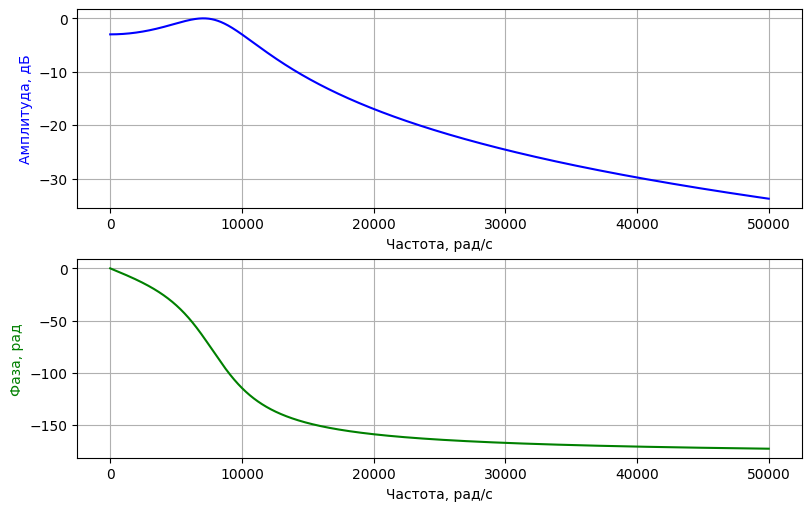

In [57]:
f0 = 10e3
f1 = 10e3
f2 = 16e3
fs = 48e3
b, a = sp.cheby1(N=2, rp=3, Wn=f0, btype='lowpass', analog=True, output='ba')
# b, a = sp.cheby1(N=2, rp=3, Wn=[f1,f2], btype='bandpass', analog=True, output='ba')

print(b)
print(a)

w, mag, phase = sp.bode(system=(b, a), w=np.arange(start=0, stop=50e3, step=1))
FRPRDiagram(w=w, fr=mag, pr=phase)

[ 0.60944134 -3.18685499  6.97031704 -8.15980053  5.39092666 -1.90536656]
[  1.          -5.2291422   11.43720626 -13.38902325   8.84567228
  -3.12641545   0.46174584]


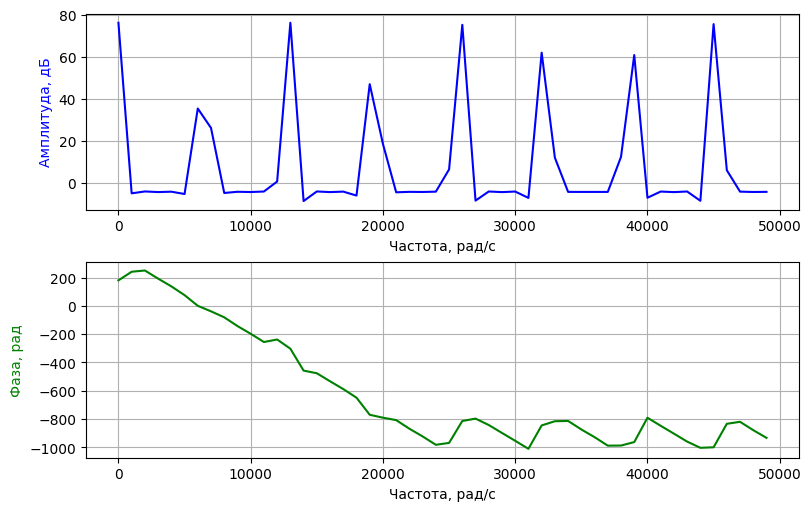

In [88]:
bz, az = pd.impinvar(b_in=b, a_in=a, fs=fs)

print(bz)
print(az)

# w, mag, phase = sp.bode(system=(bz, az), w=np.arange(start=0, stop=50e3, step=1))
w, mag, phase = sp.dbode(system=(bz, az, 1), w=np.arange(start=0, stop=50e3, step=1000))
FRPRDiagram(w=w, fr=mag, pr=phase)

#### Test 3

[64.]
[  1.           7.72740661  29.85640646  73.13296138 119.42562584
 123.63850577  64.        ]
[ 0.60944134 -3.18685499  6.97031704 -8.15980053  5.39092666 -1.90536656]
[  1.          -5.2291422   11.43720626 -13.38902325   8.84567228
  -3.12641545   0.46174584]


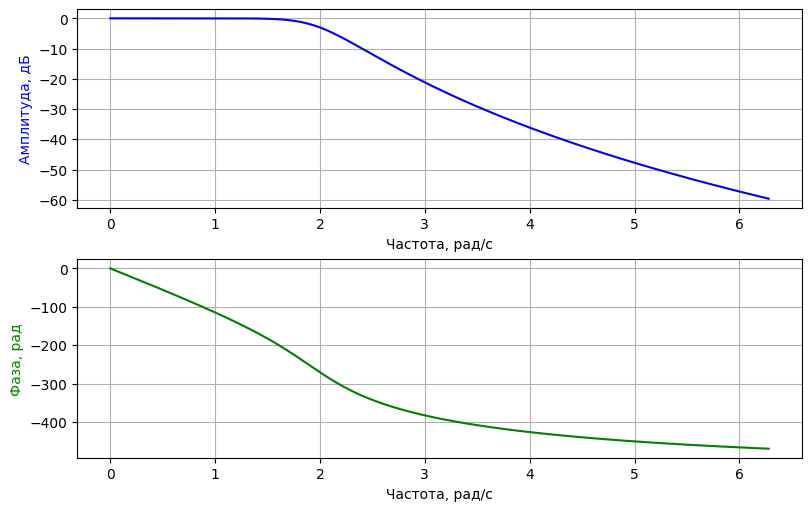

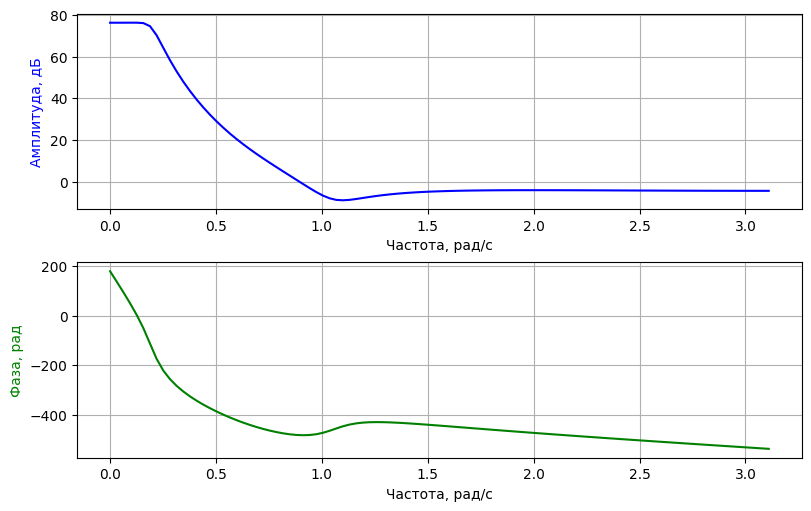

In [82]:
f = 2
fs = 10
[b, a] = sp.butter(N=6, Wn=f, btype='lowpass', analog=True, output='ba')

print(b, a, sep='\n')

[bz, az] = pd.impinvar(b_in=b, a_in=a, fs=fs)

print(bz, az, sep='\n')

w, mag, phase = sp.bode(system=(b, a), w=np.arange(start=0, stop=2*np.pi, step=0.01))
FRPRDiagram(w=w, fr=mag, pr=phase)

w, mag, phase = sp.dbode(system=(bz, az, 1))
FRPRDiagram(w=w, fr=mag, pr=phase)